# DCNN Method
By Raniera Te Moni
raniera.temoni@connect.qut.edu.au
n10083057

For the Aerial Semantic Segmentation Drone Dataset, this notebook will detail the DCNN method used.   

Dataset Overview  
The Semantic Drone Dataset focuses on semantic understanding of urban scenes for increasing the safety of autonomous drone flight and landing procedures. The imagery depicts more than 20 houses from nadir (bird's eye) view acquired at an altitude of 5 to 30 meters above ground. A high resolution camera was used to acquire images at a size of 6000x4000px (24Mpx). The training set contains 400 publicly available images and the test set is made up of 200 private images.    

SEMANTIC SEGMENTATION  
We prepared pixel-accurate annotation for the same training and test set. The complexity of the dataset is limited to 20 classes as listed in the following table.  

Table 1: Semanic classes of the Drone Dataset  

tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle

### 00 - Research

briefly describe a small number of relevant existing approaches,
their respective strengths/weaknesses and relation to each other (i.e. does one
build upon another), and the objective of your work

1. Fully Convolutional Networks (FCN): Fully Convolutional Networks (FCN) by Jonathan Long, Evan Shelhamer, and Trevor Darrell (2015).  
   
FCN is one of the pioneering models for semantic image segmentation. It replaces the fully connected layers of traditional convolutional neural networks (CNNs) with convolutional layers, enabling end-to-end pixel-wise predictions. FCN performs well in capturing fine-grained details but struggles with preserving spatial information due to pooling layers that reduce spatial resolution.

2. SegNet: SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation by Vijay Badrinarayanan, Alex Kendall, and Roberto Cipolla (2017).  

SegNet addresses the spatial information loss in FCN. It introduces an encoder-decoder architecture with skip connections. The encoder extracts features at multiple scales, while the decoder upsamples the features and fuses them with skip connections to recover spatial details. SegNet performs well in preserving boundaries but may produce fragmented segmentations due to the coarse decoding process.

3. U-Net: U-Net: Convolutional Networks for Biomedical Image Segmentation by Olaf Ronneberger, Philipp Fischer, and Thomas Brox (2015). 
   
U-Net is widely used in medical image segmentation. It features a U-shaped architecture with a contracting path (encoder) and an expanding path (decoder). Skip connections are employed to combine low-level and high-level features, aiding in accurate localization and segmentation. U-Net is effective for small dataset scenarios but may struggle with handling large variations in scale and shape.

4. DeepLab: DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs by Liang-Chieh Chen, George Papandreou, Iasonas Kokkinos, Kevin Murphy, and Alan L. Yuille (2017). 
   
DeepLab employs atrous (dilated) convolutions to capture multi-scale contextual information while preserving spatial resolution. It utilizes dilated convolutions at different rates to capture various scales of context. DeepLab achieves accurate boundaries and handles varying object sizes, but it may introduce aliasing artifacts due to dilated convolutions.

5. PSPNet: Pyramid Scene Parsing Network by Hengshuang Zhao, Jianping Shi, Xiaojuan Qi, Xiaogang Wang, and Jiaya Jia (2017). 

PSPNet employs a pyramid pooling module to capture multi-scale contextual information effectively. It partitions the input image into regions and applies pooling operations at different scales, then fuses the features to generate a global representation. PSPNet performs well in capturing contextual information but may struggle with object details and small-scale segmentation.

6. Mask R-CNN: Mask R-CNN by Kaiming He, Georgia Gkioxari, Piotr Dollar, and Ross Girshick (2017). 

Mask R-CNN combines the object detection capabilities of the Faster R-CNN model with an additional segmentation branch. It identifies object proposals and performs instance segmentation by generating a binary mask for each proposal. Mask R-CNN is versatile for object detection and segmentation tasks but may be computationally expensive and requires significant training data.

7. HRNet: High-Resolution Representations for Labeling Pixels and Regions by Jingdong Wang, Ke Sun, Tianheng Cheng, Borui Jiang, Chaorui Deng, Yang Zhao, Dong Liu, Yadong Mu, Mingkui Tan, Xinggang Wang, Wenyu Liu, and Bin Xiao (2019). 

HRNet addresses the challenge of capturing both fine-grained details and global context simultaneously. It adopts a multi-resolution fusion strategy that maintains high-resolution representations throughout the network, enabling detailed and accurate segmentation. HRNet performs well in capturing both small and large objects but may be memory-intensive and computationally demanding.

8. DeepLabv3+: Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation by Liang-Chieh Chen, Yukun Zhu, George Papandreou, Florian Schroff, and Hartwig Adam (2018). DeepLabv3+ builds upon the DeepLab architecture by incorporating atrous separable convolutions in the encoder-decoder structure. This design allows for efficient multi-scale feature integration while maintaining spatial resolution. DeepLabv3+ achieves state-of-the-art performance in semantic image segmentation, particularly in capturing fine details and handling objects at different scales.

9. Attention U-Net: Learning Where to Look for the Pancreas by Ozan Oktay, Jo Schlemper, Loic Le Folgoc, Matthew Lee, Mattias Heinrich, Kazunari Misawa, Kensaku Mori, Steven McDonagh, Nils Y. Hammerla, Bernhard Kainz, Ben Glocker, and Daniel Rueckert (2018). Attention U-Net introduces an attention mechanism to the U-Net architecture, enhancing its ability to focus on informative image regions. The attention module learns to assign importance weights to different feature maps, enabling the network to selectively attend to relevant image areas. Attention U-Net achieves improved segmentation accuracy by effectively capturing relevant contextual information.

10. BiSeNet: Bilateral Segmentation Network for Real-time Semantic Segmentation by Changqian Yu, Jingbo Wang, Chao Peng, Changxin Gao, Gang Yu, and Nong Sang (2018). BiSeNet proposes a two-branch network architecture for real-time semantic segmentation. It consists of a context path and a spatial path, which are designed to capture both global contextual information and fine spatial details. The context path utilizes a lightweight network to encode global context efficiently, while the spatial path maintains high-resolution features for precise localization. BiSeNet achieves a good balance between accuracy and efficiency, making it suitable for real-time applications.

### 00 - Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2 
from skimage.io import imshow, imread, imsave
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import scipy
from sklearn.model_selection import train_test_split

### 01 - Load the images

In [124]:
# Step 0: Load and preprocess the data
rgb_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images"
bw_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic"
color_masks_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks"
csv_file = "C:/Github/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv"
print("Loading the dataset...")
print(rgb_images_dir)
print(bw_images_dir)
print(color_masks_dir)
print(csv_file)

Loading the dataset...
C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
C:/Github/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks
C:/Github/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv


### 02 - Preprocess the Data

In [125]:
def load_data():
    rgb_images = []
    rgb_images_names = []
    bw_images = []
    bw_images_names = []
    color_masks = []
    color_masks_names = []

    # Load RGB images
    for image_name in sorted(os.listdir(rgb_images_dir)):
        image_path = os.path.join(rgb_images_dir, image_name)
        if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg'):
            label = os.path.splitext(image_name)[0]
            rgb_images.append(image_path)
            rgb_images_names.append(label)

    # Load black and white images
    for image_name in sorted(os.listdir(bw_images_dir)):
        image_path = os.path.join(bw_images_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            bw_images.append(image_path)
            bw_images_names.append(label)

    # Load color masks
    for image_name in sorted(os.listdir(color_masks_dir)):
        image_path = os.path.join(color_masks_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            color_masks.append(image_path)
            color_masks_names.append(label)

    return rgb_images, bw_images, color_masks

# Call the function to load the data
rgb_images, bw_images, color_masks = load_data()

# Print the number of images loaded
print("Number of RGB images loaded:", len(rgb_images))
print("Number of black and white images loaded:", len(bw_images))
print("Number of color masks loaded:", len(color_masks))

Number of RGB images loaded: 400
Number of black and white images loaded: 400
Number of color masks loaded: 400


### 03 - Visualise the Data

RGB image has shape: (4000, 6000, 3)
RGB image has size: 72000000
Black and white image has shape: (4000, 6000, 3)
Black and white image has size: 72000000
Color mask has shape: (4000, 6000, 3)
Color mask has size: 72000000


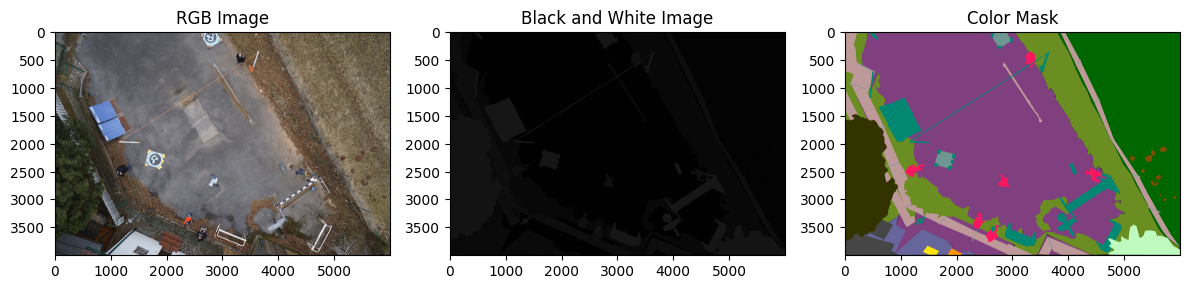

In [126]:
import matplotlib.pyplot as plt

# Select an image index to visualize
selected_index = 1

# Load the selected images
rgb_image = cv2.imread(rgb_images[selected_index])
bw_image = cv2.imread(bw_images[selected_index])
color_mask = cv2.imread(color_masks[selected_index])

# Display information about that rgb images such as size and shape
print("RGB image has shape:", rgb_image.shape)
print("RGB image has size:", rgb_image.size)

# Display information about that black and white images such as size and shape
print("Black and white image has shape:", bw_image.shape)
print("Black and white image has size:", bw_image.size)

# Display information about that color mask such as size and shape
print("Color mask has shape:", color_mask.shape)
print("Color mask has size:", color_mask.size)


# Create a figure with subplots to display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot RGB image
axes[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("RGB Image")

# Plot black and white image
axes[1].imshow(cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Black and White Image")

# Plot color mask
axes[2].imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
axes[2].set_title("Color Mask")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 04 - Do some pre processing on the images

Number of resized RGB images: 400
Number of resized black and white images: 400
Number of resized color masks: 400
RGB image is of type: <class 'numpy.ndarray'>
Black and white image is of type: <class 'numpy.ndarray'>
Color mask is of type: <class 'numpy.ndarray'>


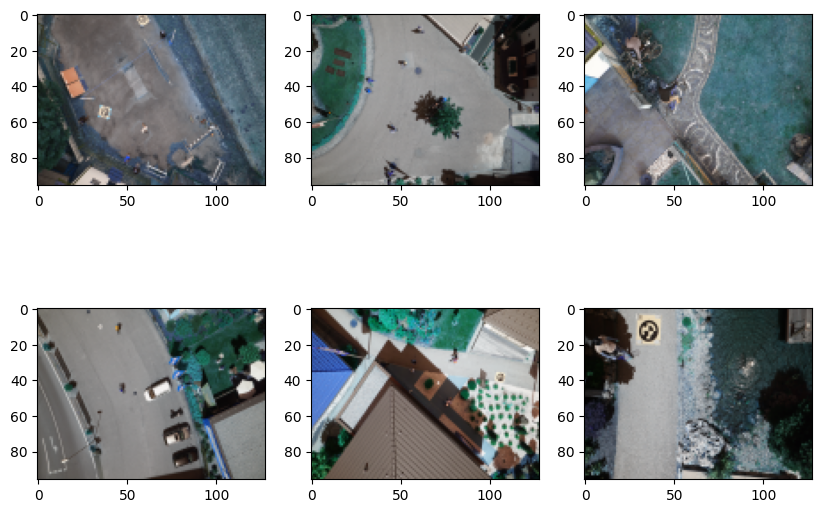

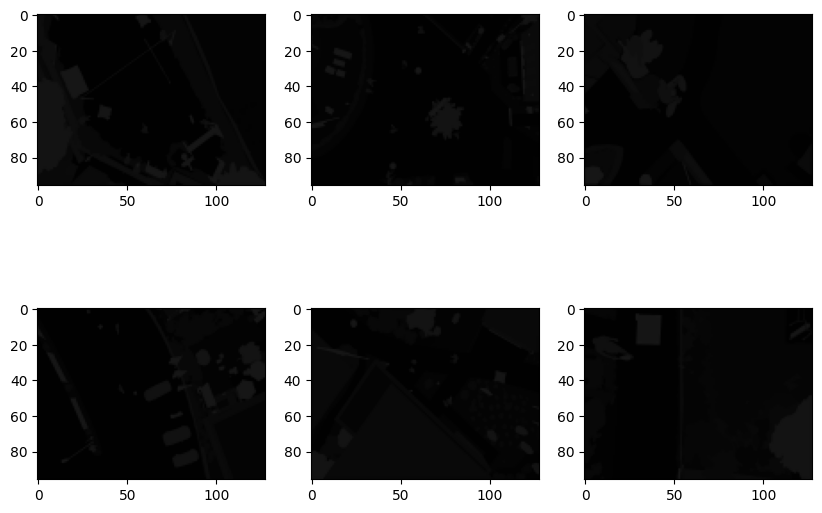

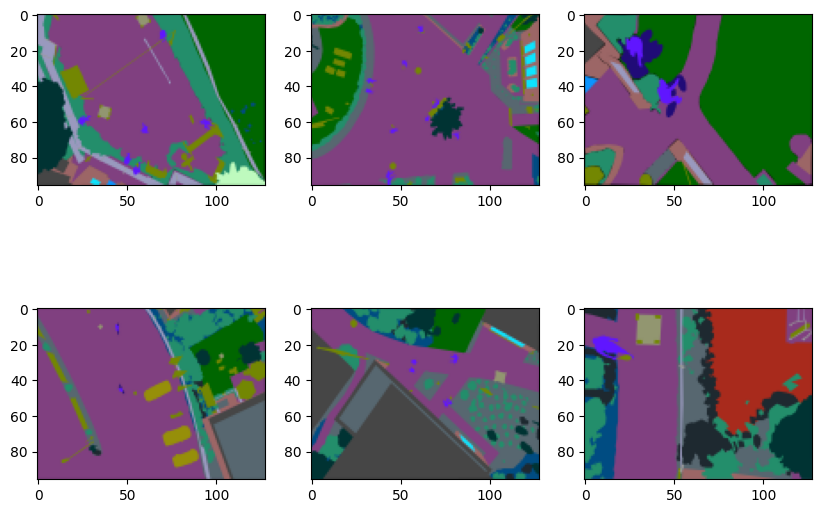

In [127]:
# Resize all the images sets to be size 256x256
def resize_images(rgb_images, bw_images, color_masks):
    resized_rgb_images = []
    resized_bw_images = []
    resized_color_masks = []

    for i in range(len(rgb_images)):
        rgb_image = cv2.imread(rgb_images[i])
        bw_image = cv2.imread(bw_images[i])
        color_mask = cv2.imread(color_masks[i])

        # Resize RGB images
        resized_rgb_image = cv2.resize(rgb_image, (128, 96), interpolation=cv2.INTER_AREA)
        resized_rgb_images.append(resized_rgb_image)

        # Resize black and white images
        resized_bw_image = cv2.resize(bw_image, (128, 96), interpolation=cv2.INTER_AREA)
        resized_bw_images.append(resized_bw_image)

        # Resize color masks
        resized_color_mask = cv2.resize(color_mask, (128, 96), interpolation=cv2.INTER_AREA)
        resized_color_masks.append(resized_color_mask)

    return resized_rgb_images, resized_bw_images, resized_color_masks

# Call the function to resize the images
resized_rgb_images, resized_bw_images, resized_color_masks = resize_images(rgb_images, bw_images, color_masks)

# Print the number of images resized
print("Number of resized RGB images:", len(resized_rgb_images))
print("Number of resized black and white images:", len(resized_bw_images))
print("Number of resized color masks:", len(resized_color_masks))

# explain what format the images are in
print("RGB image is of type:", type(resized_rgb_images[0]))
print("Black and white image is of type:", type(resized_bw_images[0]))
print("Color mask is of type:", type(resized_color_masks[0]))

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_rgb_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_bw_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_color_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# # Convert the images to numpy arrays
# resized_rgb_images = np.array(resized_rgb_images)
# resized_bw_images = np.array(resized_bw_images)
# resized_color_masks = np.array(resized_color_masks)

# # Print the shape of the resized images
# print("Shape of resized RGB images:", resized_rgb_images.shape)
# print("Shape of resized black and white images:", resized_bw_images.shape)
# print("Shape of resized color masks:", resized_color_masks.shape)

In [128]:
# There are 400 resized RGB images, 400 resized black and white images, and 400 resized color masks.
# The images are stored in numpy.ndarray format.
# The shape of the images is (96, 128, 3) for both the RGB and black and white images, and (96, 128, 3) for the color mask.
# The contents of the RGB image, black and white image, and color mask are displayed.


# Print the number of images resized
print("Number of resized RGB images:", len(resized_rgb_images))
print("Number of resized black and white images:", len(resized_bw_images))
print("Number of resized color masks:", len(resized_color_masks))

# explain what format the images are in
print("RGB image is of type:", type(resized_rgb_images[0]))
print("Black and white image is of type:", type(resized_bw_images[0]))
print("Color mask is of type:", type(resized_color_masks[0]))

# print out the shape of the images
print("RGB image has shape:", resized_rgb_images[0].shape)
print("Black and white image has shape:", resized_bw_images[0].shape)
print("Color mask has shape:", resized_color_masks[0].shape)

# print out the contents of the images
print("RGB image has contents:\n", resized_rgb_images[0])
print("Black and white image has contents:\n", resized_bw_images[0])
print("Color mask has contents:\n", resized_color_masks[0])

Number of resized RGB images: 400
Number of resized black and white images: 400
Number of resized color masks: 400
RGB image is of type: <class 'numpy.ndarray'>
Black and white image is of type: <class 'numpy.ndarray'>
Color mask is of type: <class 'numpy.ndarray'>
RGB image has shape: (96, 128, 3)
Black and white image has shape: (96, 128, 3)
Color mask has shape: (96, 128, 3)
RGB image has contents:
 [[[ 35 114 106]
  [ 34 118 111]
  [ 34 107  93]
  ...
  [149 143 134]
  [ 90  80  75]
  [ 41  27  24]]

 [[ 29 105  98]
  [ 30 105  95]
  [ 34 106  94]
  ...
  [ 78  67  63]
  [ 39  27  23]
  [ 66  49  42]]

 [[ 30 111 102]
  [ 30 105  96]
  [ 26  79  65]
  ...
  [ 43  28  25]
  [106  89  80]
  [189 177 166]]

 ...

 [[132 128 121]
  [135 130 124]
  [136 131 124]
  ...
  [125 121 114]
  [122 118 112]
  [120 115 109]]

 [[131 125 118]
  [131 126 119]
  [133 128 121]
  ...
  [122 116 110]
  [124 118 112]
  [120 116 111]]

 [[130 124 116]
  [131 126 118]
  [133 129 121]
  ...
  [117 113 107

In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### 04 - Split the Data into Train/Test Images

In [130]:
# Step 2: Prepare the training data
# the new data is resized_rgb_images, resized_bw_images, resized_color_masks
input_images = resized_rgb_images  # Use RGB images as input
output_masks = resized_color_masks  # Use color masks as output

# input_images = rgb_images  # Use RGB images as input
# output_masks = color_masks  # Use color masks as output

# Step 3: Split the data
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(input_images, output_masks, test_size=test_ratio, random_state=42)

# Further split train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)


# Convert this list to numpy array
train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)
test_images = np.array(test_images)
test_masks = np.array(test_masks)

In [131]:
# Print the number of images and masks
print("Number of train images:", len(train_images))
print("Number of train masks:", len(train_masks))
print("Number of val images:", len(val_images))
print("Number of val masks:", len(val_masks))
print("Number of test images:", len(test_images))
print("Number of test masks:", len(test_masks))

# Print the type of the train, val and test sets
print("Type of train images:", type(train_images))
print("Type of train masks:", type(train_masks))
print("Type of val images:", type(val_images))
print("Type of val masks:", type(val_masks))
print("Type of test images:", type(test_images))
print("Type of test masks:", type(test_masks))

# Print the shape of the train, val and test sets
print("Shape of train images:", train_images.shape)
print("Shape of train masks:", train_masks.shape)
print("Shape of val images:", val_images.shape)
print("Shape of val masks:", val_masks.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test masks:", test_masks.shape)

Number of train images: 279
Number of train masks: 279
Number of val images: 81
Number of val masks: 81
Number of test images: 40
Number of test masks: 40
Type of train images: <class 'numpy.ndarray'>
Type of train masks: <class 'numpy.ndarray'>
Type of val images: <class 'numpy.ndarray'>
Type of val masks: <class 'numpy.ndarray'>
Type of test images: <class 'numpy.ndarray'>
Type of test masks: <class 'numpy.ndarray'>
Shape of train images: (279, 96, 128, 3)
Shape of train masks: (279, 96, 128, 3)
Shape of val images: (81, 96, 128, 3)
Shape of val masks: (81, 96, 128, 3)
Shape of test images: (40, 96, 128, 3)
Shape of test masks: (40, 96, 128, 3)


In [132]:
print("Shape of train images:", train_images.shape)
print("Shape of train masks:", train_masks.shape)
print("Shape of val images:", val_images.shape)
print("Shape of val masks:", val_masks.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test masks:", test_masks.shape)

print("Unique values of train masks:", np.unique(train_masks))
print("Unique values of val masks:", np.unique(val_masks))
print("Unique values of test masks:", np.unique(test_masks))


Shape of train images: (279, 96, 128, 3)
Shape of train masks: (279, 96, 128, 3)
Shape of val images: (81, 96, 128, 3)
Shape of val masks: (81, 96, 128, 3)
Shape of test images: (40, 96, 128, 3)
Shape of test masks: (40, 96, 128, 3)
Unique values of train masks: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 18

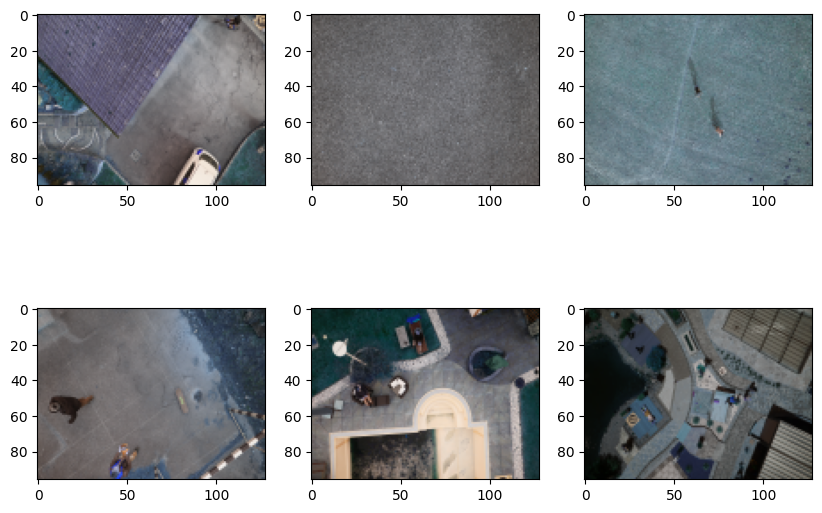

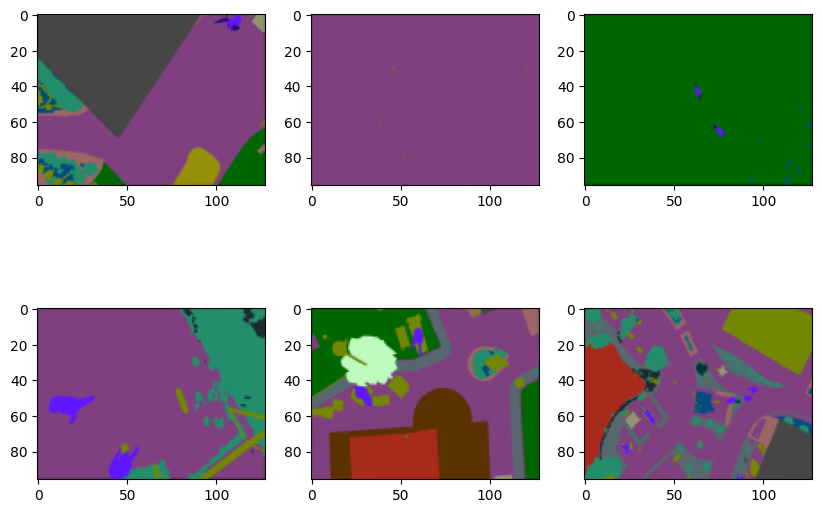

<Figure size 1000x700 with 0 Axes>

In [133]:
# Visualise some of the images from each of train images, val images and test images and their corresponding masks
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    img = train_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2

### 05 - Generate Color Masks

This script defines a function convert_masks() that takes a list or array of color masks and a DataFrame of class definitions and returns a corresponding array of label maps. It then uses this function to convert train_mask, val_mask, and test_mask into label maps.

In [144]:
import numpy as np
import pandas as pd

def convert_masks(masks, class_dict):
    # Convert the masks to a numpy array if not already
    masks = np.array(masks)

    # Create an empty label map with the same dimensions as your masks
    label_maps = np.zeros((masks.shape[0], masks.shape[1], masks.shape[2]), dtype=np.uint8)

    # Iterate over each class
    for i, row in class_dict.iterrows():
        # Get the RGB value of this class
        rgb_values = np.array([row[" r"], row[" g"], row[" b"]])

        # Create a mask that is True where the image is this RGB value
        mask = np.all(masks == rgb_values, axis=-1)

        # In the label map, set the pixels where the mask is True to the class index
        label_maps[mask] = i

    return label_maps

# Load your class dictionary
class_dict = pd.read_csv("class_dict_seg.csv")

# Convert the masks for training, validation, and testing
train_label_maps = convert_masks(train_masks, class_dict)
val_label_maps = convert_masks(val_masks, class_dict)
test_label_maps = convert_masks(test_masks, class_dict)

# print a summary of the new maps variables
print("Shape of train label maps:", train_label_maps.shape)
print("Shape of val label maps:", val_label_maps.shape)
print("Shape of test label maps:", test_label_maps.shape)


Shape of train label maps: (279, 96, 128)
Shape of val label maps: (81, 96, 128)
Shape of test label maps: (40, 96, 128)


### 05 - VGG-16 Model

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# imports
import time
from time import process_time
import numpy as np
import numpy
import scipy.io
import cv2
from tensorboard import notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from skimage.color import convert_colorspace
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import concurrent.futures
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model

In [145]:
# Define the VGG16 model
num_classes = 25

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras import backend as K

def VGG_model():
    inputs = Input((image_height, image_width, num_channels))

    x = inputs
    for i in range(2):
        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    for i in range(2):
        x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    for i in range(3):
        x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    for i in range(3):
        x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    for i in range(3):
        x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Upsampling and establishing a skip connection
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = Conv2D(num_classes, (3, 3), activation='relu', padding='same')(x)

    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = Conv2D(num_classes, (3, 3), activation='relu', padding='same')(x)

    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = Conv2D(num_classes, (3, 3), activation='relu', padding='same')(x)

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = Conv2D(num_classes, (3, 3), activation='relu', padding='same')(x)

    # Adding the final Conv2DTranspose layer to upsample to original image size
    x = Conv2DTranspose(num_classes, (2, 2), strides=(2, 2), padding='same')(x)
    
    # Final layer with softmax activation for probabilities
    output_layer = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(x)

    model = Model(inputs, output_layer)
    return model

image_height = train_images[0].shape[0]
image_width = train_images[0].shape[1]
num_classes = 23
num_channels = 3


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 96, 128, 3)]      0         
                                                                 
 conv2d_244 (Conv2D)         (None, 96, 128, 64)       1792      
                                                                 
 conv2d_245 (Conv2D)         (None, 96, 128, 64)       36928     
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 48, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_246 (Conv2D)         (None, 48, 64, 128)       73856     
                                                                 
 conv2d_247 (Conv2D)         (None, 48, 64, 128)       147584    
                                                           

### 06 - Train the Model

In [150]:
from tensorflow.keras.utils import to_categorical

# Convert label maps to one-hot encoded format
train_label_maps_onehot = to_categorical(train_label_maps, num_classes=num_classes)
val_label_maps_onehot = to_categorical(val_label_maps, num_classes=num_classes)
test_label_maps_onehot = to_categorical(test_label_maps, num_classes=num_classes)

# Define and compile the model
model_vgg_1 = VGG_model()
model_vgg_1.summary()


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 96, 128, 3)]      0         
                                                                 
 conv2d_298 (Conv2D)         (None, 96, 128, 64)       1792      
                                                                 
 conv2d_299 (Conv2D)         (None, 96, 128, 64)       36928     
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 48, 64, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_300 (Conv2D)         (None, 48, 64, 128)       73856     
                                                                 
 conv2d_301 (Conv2D)         (None, 48, 64, 128)       147584    
                                                          

In [151]:

model_vgg_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_vgg_1.fit(train_images, train_label_maps_onehot, validation_data=(val_images, val_label_maps_onehot), batch_size=32, epochs=10)

# Evaluate the model on the test set
test_loss, test_accuracy = model_vgg_1.evaluate(test_images, test_label_maps_onehot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
9/9 [==============================] - 30s 3s/step - loss: 5.2657 - accuracy: 0.2924 - val_loss: 13.1149 - val_accuracy: 0.1750
Epoch 2/10
9/9 [==============================] - 29s 3s/step - loss: 4.1531 - accuracy: 0.3318 - val_loss: 3.0342 - val_accuracy: 0.3808
Epoch 3/10
9/9 [==============================] - 29s 3s/step - loss: 3.0078 - accuracy: 0.3802 - val_loss: 2.9721 - val_accuracy: 0.3790
Epoch 4/10
9/9 [==============================] - 28s 3s/step - loss: 2.9419 - accuracy: 0.3802 - val_loss: 2.9013 - val_accuracy: 0.3802
Epoch 5/10
9/9 [==============================] - 28s 3s/step - loss: 2.8647 - accuracy: 0.3818 - val_loss: 2.8142 - val_accuracy: 0.3802
Epoch 6/10
9/9 [==============================] - 28s 3s/step - loss: 2.7655 - accuracy: 0.3816 - val_loss: 2.6954 - val_accuracy: 0.3830
Epoch 7/10
9/9 [==============================] - 28s 3s/step - loss: 2.6229 - accuracy: 0.3830 - val_loss: 2.5137 - val_accuracy: 0.3834
Epoch 8/10
9/9 [=================

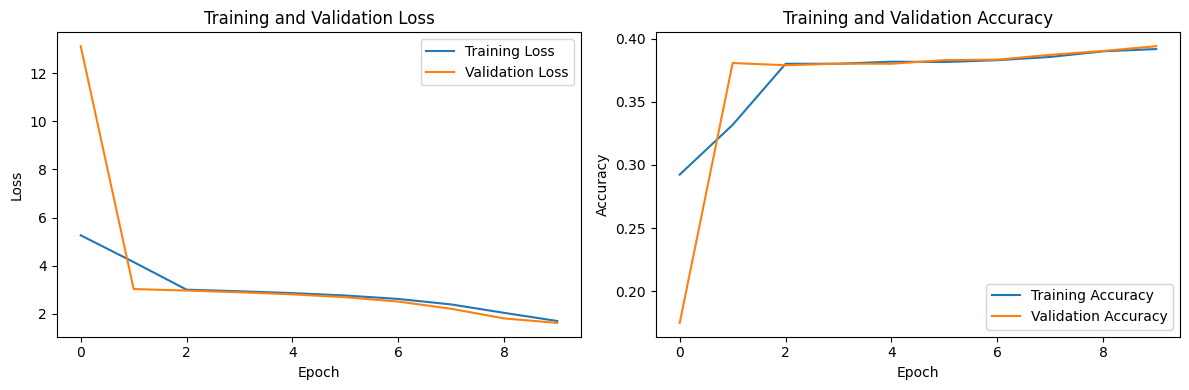

9/9 [==============================] - 5s 496ms/step


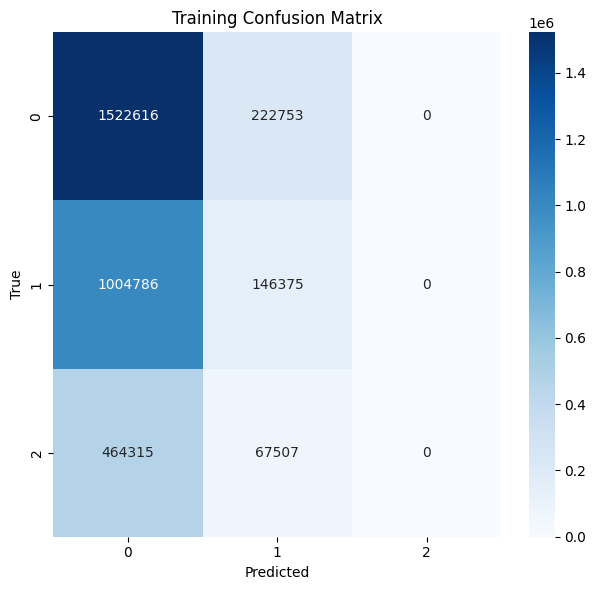

1/1 [==============================] - 0s 57ms/step


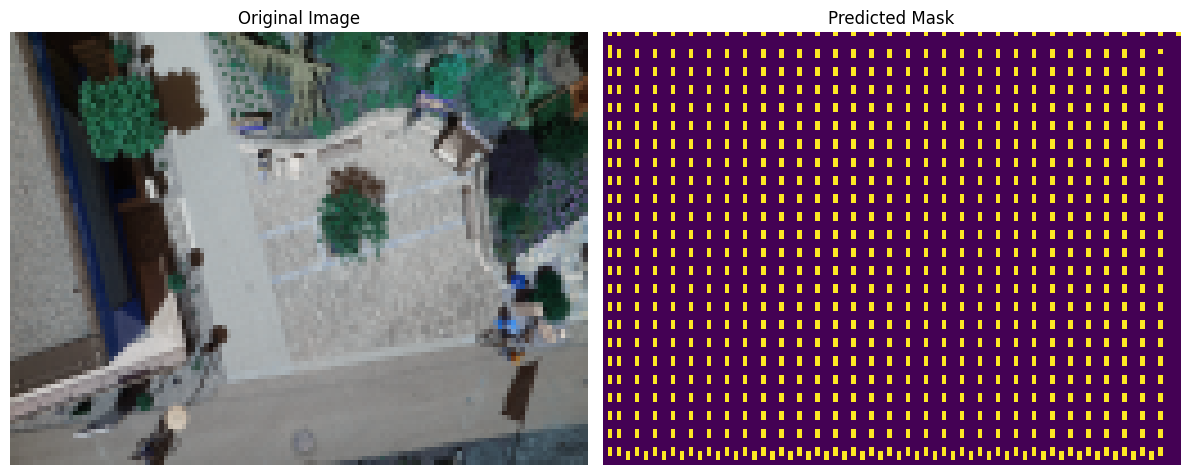

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... Existing code ...

# Step 4: Train a U-Net model
# ...

# Step 5: Train the model
# ...

# Plot training and validation loss and accuracy
def plot_loss_and_accuracy(history):
    plt.figure(figsize=[12, 4])

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_and_accuracy(history)

# Step 6: Evaluate the model
# ...

# Plot confusion matrices
def plot_confusion_matrix(images, masks, model):
    # Predict masks for the images
    predicted_masks = model.predict(images)

    # Convert masks and predicted masks to categorical
    masks_categorical = np.argmax(masks, axis=3)
    predicted_masks_categorical = np.argmax(predicted_masks, axis=3)

    # Calculate confusion matrices
    train_confusion_mtx = confusion_matrix(np.ravel(masks_categorical), np.ravel(predicted_masks_categorical))

    # Plot confusion matrices
    plt.figure(figsize=[12, 6])

    plt.subplot(1, 2, 1)
    sns.heatmap(train_confusion_mtx, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Training Confusion Matrix')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(train_images, train_masks, model_vgg_1)

# Plot the original image and predicted mask
def plot_image_with_mask(image, mask, model):
    # Predict the mask for the image
    predicted_mask = model.predict(np.expand_dims(image, axis=0))

    # Convert mask and predicted mask to categorical
    mask_categorical = np.argmax(mask, axis=2)
    predicted_mask_categorical = np.argmax(predicted_mask[0], axis=2)

    # Plot the image and predicted mask
    plt.figure(figsize=[12, 6])

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask_categorical)
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot the image and predicted mask for a sample image
sample_image_index = 0
plot_image_with_mask(train_images[sample_image_index], train_masks[sample_image_index], model_vgg_1)

# Step 7: Save and load the model
# ...

In [153]:
import random
train_testing_id = random.randint(0, len(train_images))

In [154]:
def display(display_list):
    plt.figure(figsize=(20, 20))

    try:
    
        title = ['Input Image', 'True Mask', 'Predicted Mask',]

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()
        
    except:
    
        title = ['Input Image 1', 'True Mask 1', 'Predicted Mask 1', 'Input Image 2', 'True Mask 2', 'Predicted Mask 2']

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()

In [155]:
def show_predictions(x_train = train_images, y_train = train_masks, num=1):
    #try:
    pred_mask = model_vgg_1.predict(np.expand_dims(x_train[train_testing_id], 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    display([train_images[train_testing_id], train_masks[train_testing_id], pred_mask])

1/1 [==============================] - 0s 55ms/step


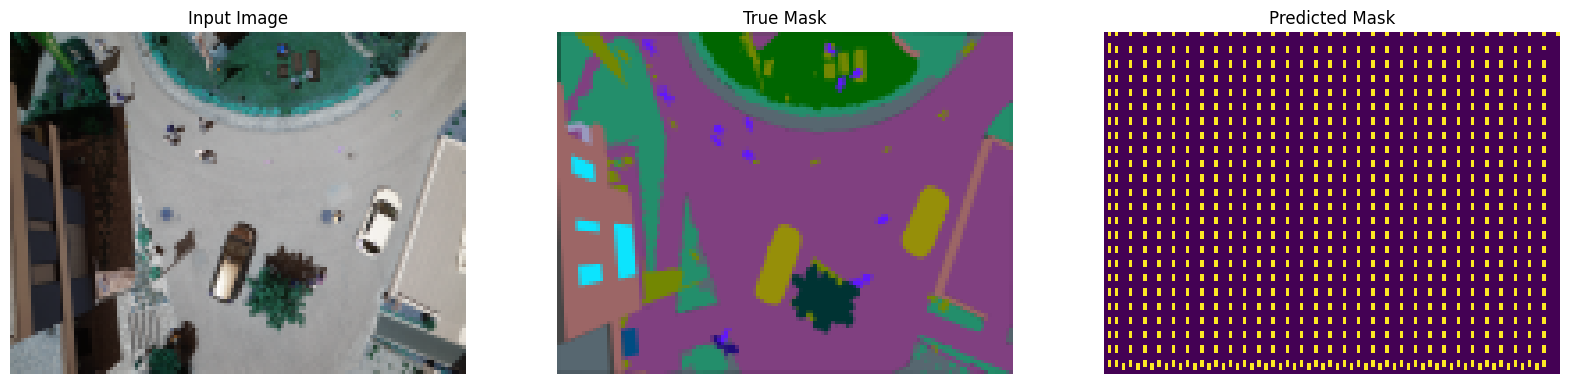

In [156]:
show_predictions()

<AxesSubplot:>

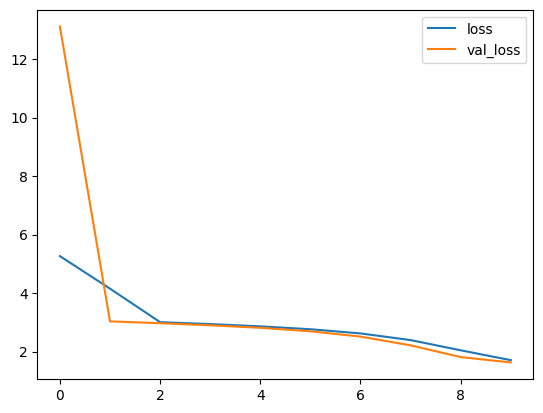

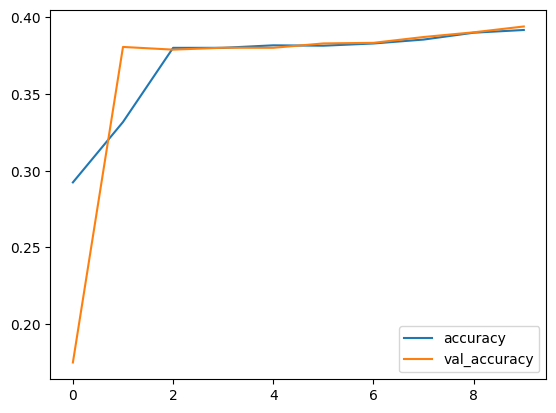

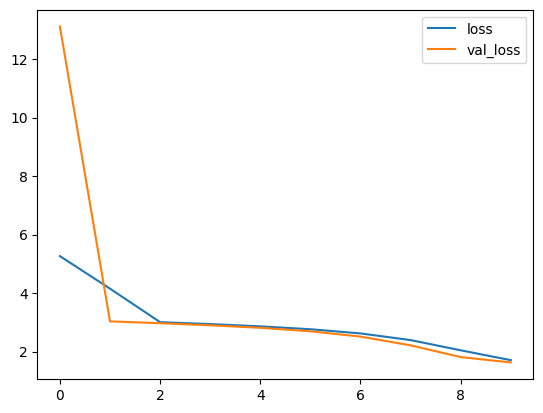

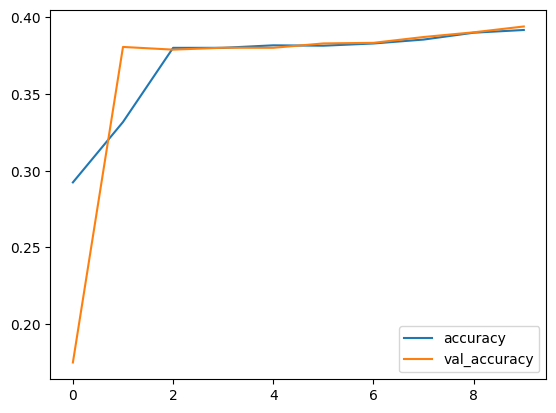

In [157]:
# # plot confusion matrix for test data
# y_pred = unet_model_created.predict(test_images)
# y_pred = np.argmax(y_pred, axis=1)
# y_true = np.argmax(test_masks, axis=1)
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(23))
# disp.plot()
# plt.show()

# Plot the training and validation accuracy and loss at each epoch
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

# Plot the training and validation loss at each epoch
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

# Plot the training and validation accuracy at each epoch
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [158]:
def train_and_eval(model, train, train_y, test, test_y, loss, optimizer, metrics, batch_size, epochs):

    # compile the network
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
    
    # fit the model
    # make the batch size smaller
    # increase the epochs number of iterations of the dataset
    # add decay rate for epoch
    history = model.fit(train, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(test, test_y),
                        verbose=False)
    
    # plot training and validation loss and accuracy
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    # plot confusion matrices and F1 scores
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    pred = model.predict(train, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    ax = fig.add_subplot(1, 2, 2)    
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

In [159]:
import time
from time import process_time

In [160]:
# Attempt 1
loss='categorical_crossentropy'
optimizer=keras.optimizers.Adam()
metrics=['accuracy']
batch_size=16
epochs=1
# START TIME
without_aug_start = process_time()
train_and_eval(model_vgg_1, train_images, train_masks, test_images, test_masks, loss, optimizer, metrics, batch_size, epochs)
without_aug_stop = process_time()
print('Time to train and evaluate without augmentation: %f' % (without_aug_stop - without_aug_start))

ValueError: in user code:

    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\rante\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 96, 128, 3) and (None, 96, 128, 23) are incompatible
